# -----Let'sGrowMore VIP Inernship Task-2-----
***PROBLEM STATEMENT :-- Develop A Neural Network That can read Handwriting. ***

***SWETA PANDEY*** 

# 1. Importing the requried modules

In [1]:
import tensorflow
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation,Flatten,Conv2D,MaxPooling2D

# 2. Loding the dataset

In [2]:
mnist=tensorflow.keras.datasets.mnist

# Dividing our data into train and test set

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# Analyzing the train set

In [4]:
x_train.shape

(60000, 28, 28)

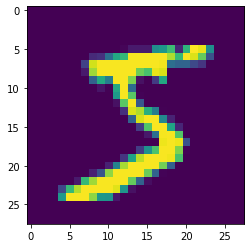

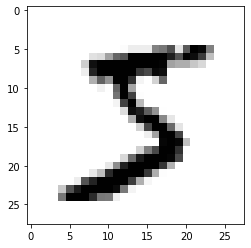

In [5]:
#ploting the first element of train set
plt.imshow(x_train[0])
plt.show()
#ploing the binary image of the same 
plt.imshow(x_train[0], cmap=plt.cm.binary)

# Pre-processing the data

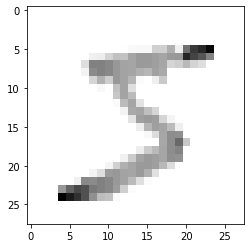

In [6]:
x_train=tensorflow.keras.utils.normalize(x_train,axis=1)
x_test= tensorflow.keras.utils.normalize(x_test, axis=1)
#after Normalizing 
#ploting the binary image of first element of train set
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [7]:
#increasing one dimension for filter operation
x_train=np.array(x_train).reshape(-1,28, 28, 1)
#increasing one dimension for filter operation 
x_test=np.array(x_test).reshape(-1,28,28,1)
print("Train set dimesion: ",x_train.shape)
print("Test set dimesion: ",x_test.shape)

Train set dimesion:  (60000, 28, 28, 1)
Test set dimesion:  (10000, 28, 28, 1)


# Creating the CNN model

In [8]:
model = Sequential()

#1st convolution Layer
model.add(Conv2D(64,(3,3), input_shape= x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#3rd convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#1st fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))



#2nd fully connected layer
model.add(Dense(32))
model.add(Activation('relu'))


#3rd fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))
          
          
          


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [10]:
len(x_train)

60000

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [12]:
len(x_train)

60000

In [13]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3,batch_size=1)

Epoch 1/5
42000/42000 [==============================] - 276s 6ms/step - loss: 0.2277 - accuracy: 0.9318 - val_loss: 0.1513 - val_accuracy: 0.9591
Epoch 2/5
42000/42000 [==============================] - 266s 6ms/step - loss: 0.1123 - accuracy: 0.9698 - val_loss: 0.1664 - val_accuracy: 0.9633
Epoch 3/5
42000/42000 [==============================] - 261s 6ms/step - loss: 0.0991 - accuracy: 0.9743 - val_loss: 0.1797 - val_accuracy: 0.9579
Epoch 4/5
42000/42000 [==============================] - 260s 6ms/step - loss: 0.0910 - accuracy: 0.9767 - val_loss: 0.1660 - val_accuracy: 0.9722
Epoch 5/5
42000/42000 [==============================] - 261s 6ms/step - loss: 0.0948 - accuracy: 0.9772 - val_loss: 0.1285 - val_accuracy: 0.9679


# Evaluation the model

In [14]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test accuracy on samples: ", test_acc)
print("Test accuracy on samples: ", test_loss)

313/313 [==============================] - 5s 15ms/step - loss: 0.1229 - accuracy: 0.9706
Test accuracy on samples:  0.9706000089645386
Test accuracy on samples:  0.12285260111093521


# Testing with custom image

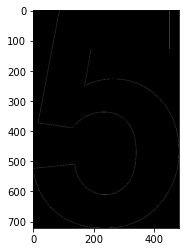

In [24]:
img = cv2.imread('five.png')
plt.imshow(img)

In [25]:
img.shape

(721, 482, 3)

In [26]:
img=cv2.resize((cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)),(28,28),interpolation=cv2.INTER_AREA)

In [27]:
img.shape

(28, 28)

In [28]:
img = tensorflow.keras.utils.normalize(img, axis=1)

In [29]:
img =np.array(img).reshape(-1,28,28,1)

In [30]:
img.shape

(1, 28, 28, 1)

In [31]:
print("Number predicted ==>")
print(np.argmax(model.predict(img)))

Number predicted ==>
5
